In [2]:
import control as ct
from scipy import signal
from scipy.signal import tf2sos
from scipy.signal import freqs
import numpy as np #Importa libreria numerica
import sympy as sym #simbolica
import matplotlib.pyplot as plt #importa matplotlib solo pyplot
print("listo")

listo


In [3]:
fp = [800, 1250] #Puntos banda de Paso [Hz]
fs = [200, 5000] #Puntos banda de Rechazo [Hz]

wp = np.dot(2*np.pi, fp)  #Puntos banda de paso [Rad/s]
ws = np.dot(2*np.pi, fs)  #Puntos banda de Rechazo [Rad/s]

Ap = 0.25 #Atenuación Máxima Banda de Paso [dB]
As = 30 #Atenuación Mínima Banda de Rechazo [dB]

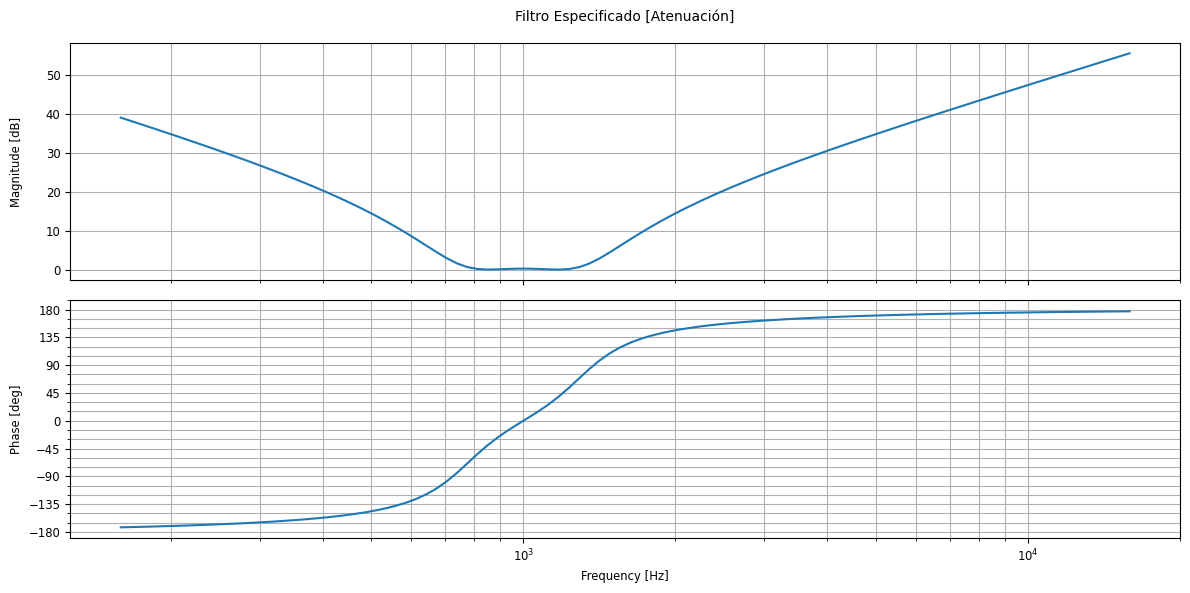

In [4]:
N, wn = signal.cheb1ord(wp, ws, Ap, As, analog = True)  #Retorna el orden mínimo del filtro y las frecuencias de corte
b, a = signal.cheby1(N, Ap, wn, btype = "bandpass", analog = True) #Retorna los coef del numerador(b) y del denominador (a) del filtro sintetizado

FiltroAten = ct.TransferFunction(a, b)
Filtro = ct.TransferFunction(b, a)

omega = np.logspace(3, 5, 100)
plt.figure(figsize=(12, 6))
ct.bode_plot(FiltroAten, omega, dB = True, Hz = True, title="Filtro Especificado [Atenuación]")
plt.show()
     

In [5]:
print(Filtro)

<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                       1.642e+07 s^2
  --------------------------------------------------------
  s^4 + 5080 s^3 + 9.586e+07 s^2 + 2.006e+11 s + 1.559e+15


[[1.64208994e+07 0.00000000e+00 0.00000000e+00 1.00000000e+00
  3.18442632e+03 6.63208202e+07]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.89557535e+03 2.35000932e+07]]
Pasa Alto: <TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

            s^2
  -----------------------
  s^2 + 1896 s + 2.35e+07
Pasa Bajo: <TransferFunction>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         1.642e+07
  ------------------------
  s^2 + 3184 s + 6.632e+07


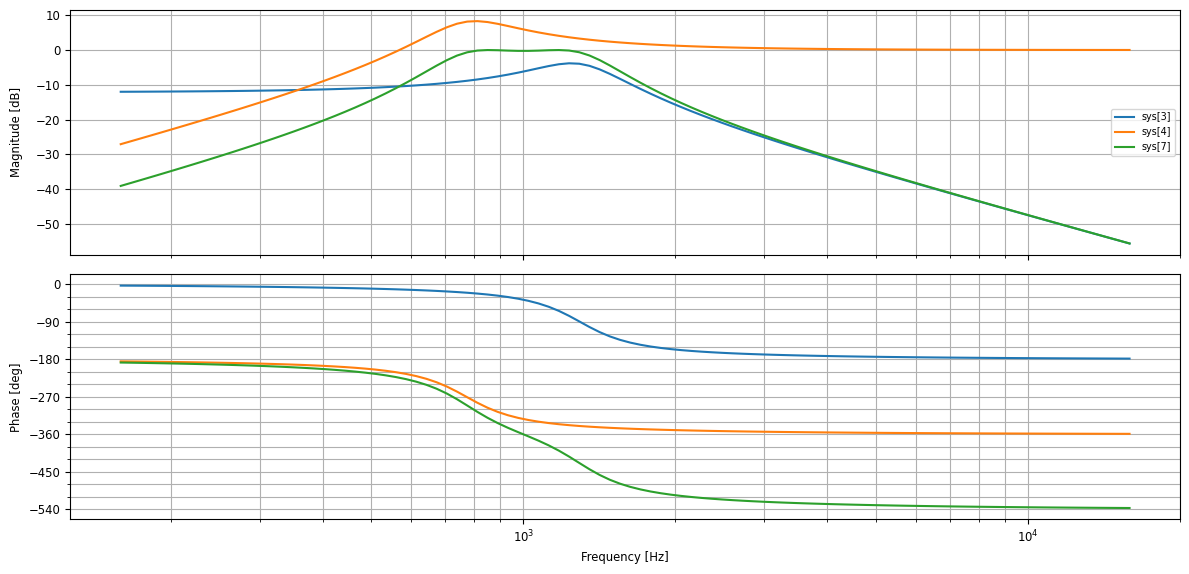

In [6]:
#Implementación como Pasa Bajo + Pasa Alto

sos = tf2sos(b, a)
print(sos)

LowPass = ct.TransferFunction(sos[0][0],sos[0][3:6])
HighPass = ct.TransferFunction(sos[1][0:3],sos[1][3:6])
print(f"Pasa Alto: {HighPass}")
print(f"Pasa Bajo: {LowPass}")

omega = np.logspace(3, 5, 100)

plt.figure(figsize=(12, 6))
ct.bode_plot(LowPass, omega, dB = True, Hz = True)
ct.bode_plot(HighPass, omega, dB = True, Hz = True)
ct.bode_plot(LowPass*HighPass, omega, dB = True, Hz = True, title="Filtros")
plt.show()